In [1]:
import pandas as pd
output = pd.read_csv("../output/output_original-20240218-165024.csv")
scores = output["score"]

In [2]:
len(scores)

6146

In [6]:
max(scores)
min(scores)

-58.77640151977539

(array([   4.,   23.,   61.,  113.,  151.,  148.,  240.,  325., 1582.,
        3499.]),
 array([-5.87764015e+01, -5.28988081e+01, -4.70212146e+01, -4.11436212e+01,
        -3.52660277e+01, -2.93884343e+01, -2.35108408e+01, -1.76332474e+01,
        -1.17556539e+01, -5.87806046e+00, -4.67008562e-04]),
 <BarContainer object of 10 artists>)

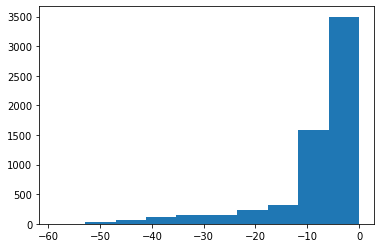

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(scores)

(array([   4.,   23.,   61.,  113.,  151.,  148.,  240.,  325., 1582.,
        3499.]),
 array([-5.87764015e+01, -5.28988081e+01, -4.70212146e+01, -4.11436212e+01,
        -3.52660277e+01, -2.93884343e+01, -2.35108408e+01, -1.76332474e+01,
        -1.17556539e+01, -5.87806046e+00, -4.67008562e-04]),
 <BarContainer object of 10 artists>)

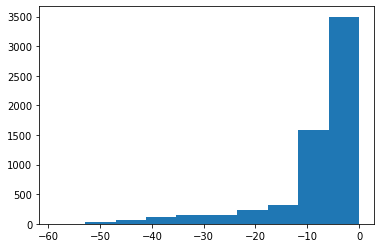

In [39]:
plt.hist(scores)

(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([2.97668688e-26, 9.99533100e-02, 1.99906620e-01, 2.99859930e-01,
        3.99813240e-01, 4.99766550e-01, 5.99719860e-01, 6.99673170e-01,
        7.99626480e-01, 8.99579790e-01, 9.99533100e-01]),
 <BarContainer object of 10 artists>)

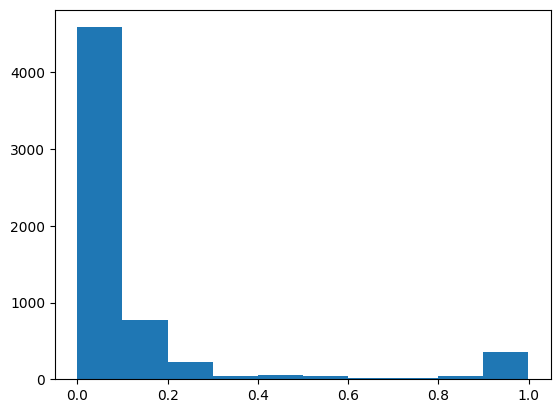

In [11]:
plt.hist(np.exp(np.array(scores)))

(array([ 529.,  711., 1234.,  806.,  693.,  880.,  416.,  315.,  312.,
         250.]),
 array([4.66986753e-05, 8.55021579e-02, 1.70957617e-01, 2.56413076e-01,
        3.41868536e-01, 4.27323995e-01, 5.12779454e-01, 5.98234913e-01,
        6.83690372e-01, 7.69145832e-01, 8.54601291e-01]),
 <BarContainer object of 10 artists>)

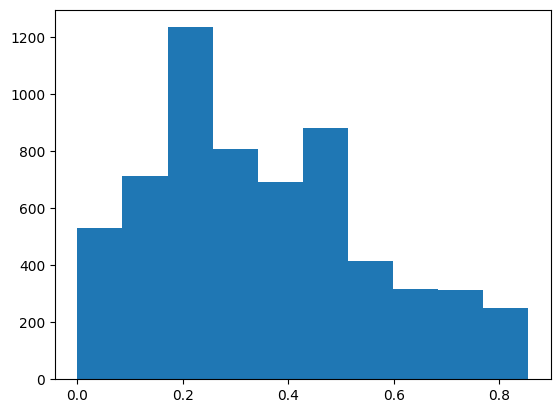

In [24]:
def get_marta_probability(scores, const):
    scores = np.array(scores)
    return scores / (const + scores)

const = 10
plt.hist(get_marta_probability(-scores, const))

(array([2737., 1386., 1017.,  258.,  221.,  149.,  170.,  134.,   57.,
          17.]),
 array([4.67006381e-06, 3.70225515e-02, 7.40404329e-02, 1.11058314e-01,
        1.48076196e-01, 1.85094077e-01, 2.22111959e-01, 2.59129840e-01,
        2.96147721e-01, 3.33165603e-01, 3.70183484e-01]),
 <BarContainer object of 10 artists>)

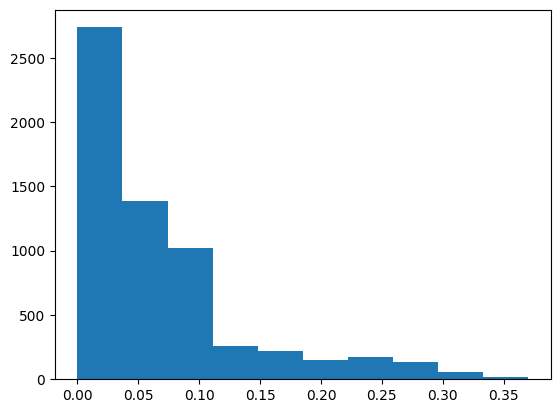

In [25]:
const = 100
plt.hist(get_marta_probability(-scores, const))

In [ ]:
def get_marta_affinity(scores, const):
    """
    Equivalent to trying to rederive a score, and labelling it a binding affinity
    """
    scores = np.array(scores)
    # Actually, cannot be done without a probability in the first place.
    


(array([ 501.,  119.,  252.,  446.,  442.,  338.,  298.,  332.,  335.,
        3083.]),
 array([0.09094769, 0.18185292, 0.27275816, 0.36366339, 0.45456862,
        0.54547385, 0.63637908, 0.72728431, 0.81818954, 0.90909477,
        1.        ]),
 <BarContainer object of 10 artists>)

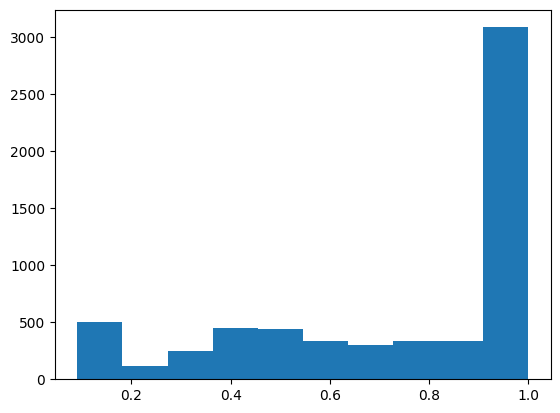

In [37]:
def get_arr_probability(energies, const):
    scores = np.array(energies)
    return 1 / (1 + const * np.exp(energies))

plt.hist(get_arr_probability(scores, const=10))

(array([ 391.,   34.,   42.,   51.,   25.,   93.,  231.,  570.,  713.,
        3996.]),
 array([0.50011675, 0.55010508, 0.6000934 , 0.65008173, 0.70007005,
        0.75005838, 0.8000467 , 0.85003503, 0.90002335, 0.95001168,
        1.        ]),
 <BarContainer object of 10 artists>)

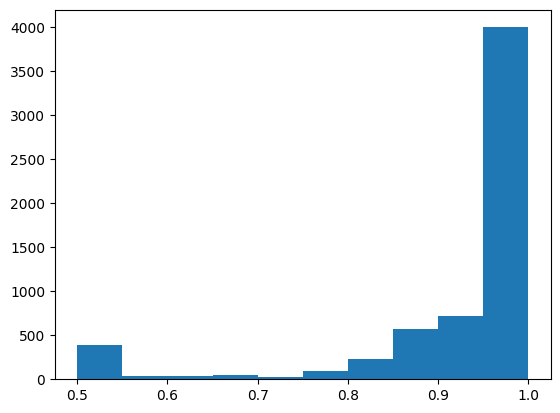

In [39]:
plt.hist(get_arr_probability(scores, const=1))

(array([3095.,  313.,  149.,  118.,  118.,  123.,  118.,  170.,  250.,
        1692.]),
 array([9.99467184e-04, 1.00899520e-01, 2.00799574e-01, 3.00699627e-01,
        4.00599680e-01, 5.00499734e-01, 6.00399787e-01, 7.00299840e-01,
        8.00199893e-01, 9.00099947e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

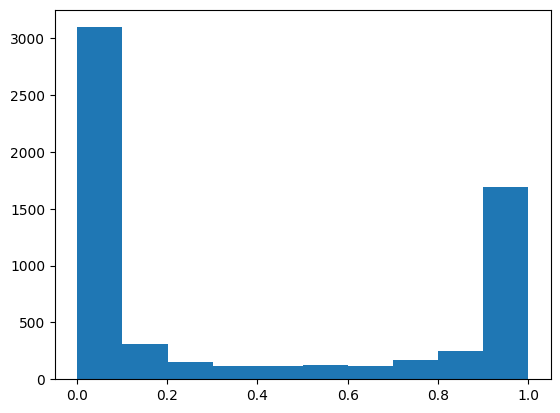

In [38]:
plt.hist(get_arr_probability(scores, const=1000))

In [4]:
from affinity_calibration import get_artificial_scores, reverse_artificial_scores, solve_for_transformation

In [2]:
affinities = [0.1, 3.5]
art_score_range = get_artificial_scores(affinities)
art_score_range

[-19.144843760546294, -2.9946063594121547e-05]

In [6]:
score_range = (min(scores),max(scores))
score_range

(-58.77640151977539, -0.0004670085618272)

In [8]:
A, B = solve_for_transformation(score_range, art_score_range)

In [9]:
import numpy as np

A * np.array(score_range) + B

array([-1.91448438e+01, -2.99460636e-05])

(array([   4.,   23.,   61.,  113.,  151.,  148.,  240.,  325., 1582.,
        3499.]),
 array([-1.91448438e+01, -1.72303624e+01, -1.53158810e+01, -1.34013996e+01,
        -1.14869182e+01, -9.57243685e+00, -7.65795547e+00, -5.74347409e+00,
        -3.82899271e+00, -1.91451133e+00, -2.99460636e-05]),
 <BarContainer object of 10 artists>)

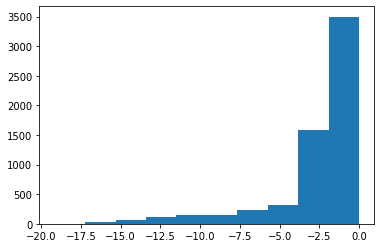

In [10]:
transformed_scores = A * np.array(scores) + B
plt.hist(transformed_scores)

(array([5.860e+02, 1.821e+03, 3.203e+03, 1.670e+02, 5.600e+01, 5.000e+01,
        1.340e+02, 1.080e+02, 1.800e+01, 3.000e+00]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

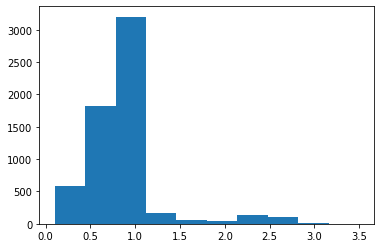

In [11]:
plt.hist(reverse_artificial_scores(transformed_scores))

In [6]:
def get_assumed_affinities(scores, affinity_range, *args):
    """
    Assuming that the scores are correct up to a linear transformation, and our method of constructing artificial scores is correct, find the transformation that makes our scores align with the expected score range, and turn these scores into affinities.
    """
    score_range = (min(scores), max(scores))
    art_score_range = get_artificial_scores(affinity_range, *args)
    A, B = solve_for_transformation(score_range, art_score_range)
    transformed_scores = A * np.array(scores) + B
    assumed_affinities = reverse_artificial_scores(transformed_scores, *args)
    return assumed_affinities


(array([5.860e+02, 1.821e+03, 3.203e+03, 1.670e+02, 5.600e+01, 5.000e+01,
        1.340e+02, 1.080e+02, 1.800e+01, 3.000e+00]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

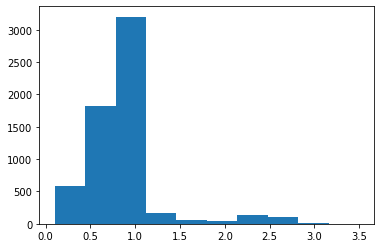

In [8]:
almeida_affinities = get_assumed_affinities(scores, [0.1, 3.5])
plt.hist(almeida_affinities)

In [30]:
hebeisen_dissociation_range = [0.015, 21.4]
affinity_range = [ 1 / endpoint for endpoint in hebeisen_dissociation_range]  # Assuming a unity concentration
affinity_range.reverse() # Since min and max have been swapped
hebeisen_affinities = get_assumed_affinities(scores, affinity_range)
affinity_range

[0.04672897196261683, 66.66666666666667]

(array([6.145e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.67289720e-02, 5.98587764e+00, 1.19250263e+01, 1.78641750e+01,
        2.38033236e+01, 2.97424723e+01, 3.56816210e+01, 4.16207696e+01,
        4.75599183e+01, 5.34990670e+01, 5.94382156e+01]),
 <BarContainer object of 10 artists>)

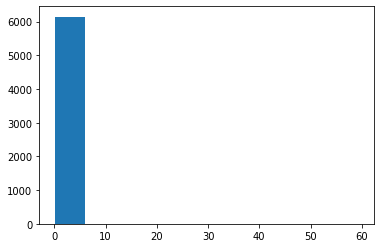

In [31]:
plt.hist(hebeisen_affinities)

(array([7.690e+02, 2.183e+03, 2.727e+03, 1.220e+02, 5.100e+01, 8.600e+01,
        1.440e+02, 5.600e+01, 6.000e+00, 1.000e+00]),
 array([0.04672897, 0.41488888, 0.78304878, 1.15120869, 1.51936859,
        1.8875285 , 2.2556884 , 2.62384831, 2.99200821, 3.36016812,
        3.72832802]),
 <BarContainer object of 10 artists>)

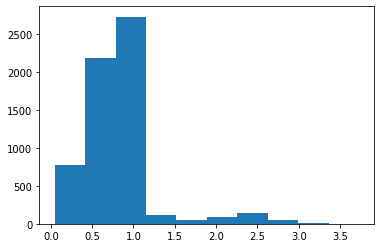

In [32]:
hebeisen_affinities.remove(max(hebeisen_affinities))
plt.hist(hebeisen_affinities)


We removed the incredibly large element, and now we can see the distribution. But this distribution seems to be shared regardless of where the score endpoints are? Or possibly it's because there are very very few values above ~-0.001, so accessing higher affinity values is much rarer.

In [17]:
len(hebeisen_affinities)
hebeisen_affinities
max(hebeisen_affinities)
min(hebeisen_affinities)

0.04672897196261684

In [28]:
count = 0
for aff in hebeisen_affinities:
    if (aff < 5):
        count += 1
count

6145

(array([ 379.,  395.,  799., 1554., 2256.,  333.,   57.,   38.,   41.,
         294.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

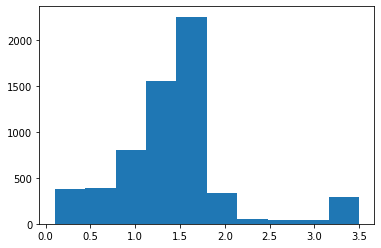

In [12]:
plt.hist(get_assumed_affinities(scores, [0.1, 3.5], 120))

`exponential_scaling_const` shifts the weight of the distribution to the right, but only subtly.

g:\Programming\UPythonSource\TULIP-TCR\analysis\affinity_calibration.py:25: RuntimeWarning: invalid value encountered in power
  return np.power(


(array([  74.,  220.,  176.,  200.,  225.,  359.,  996.,  926., 2170.,
         799.]),
 array([0.1       , 0.19318708, 0.28637417, 0.37956125, 0.47274834,
        0.56593542, 0.6591225 , 0.75230959, 0.84549667, 0.93868376,
        1.03187084]),
 <BarContainer object of 10 artists>)

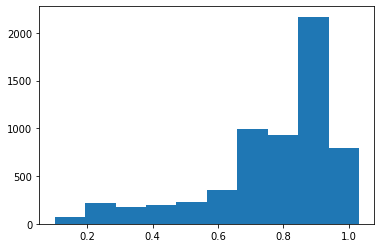

In [23]:
plt.hist(get_assumed_affinities(scores, [0.1, 3.5], 1, 30))

`dimension_nullifying_const` cuts the graph off early.

(array([ 581., 1397., 2016., 1594.,  127.,   34.,   38.,   23.,   32.,
         304.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

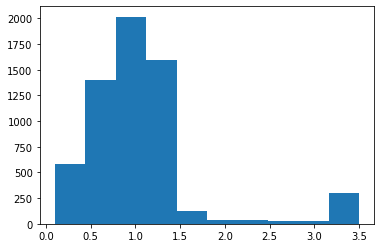

In [29]:
plt.hist(get_assumed_affinities(scores, [0.1, 3.5], 1, 0.5))

(array([ 509.,  485., 1134.,  860.,  873., 1037.,  634.,  119.,   81.,
         414.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

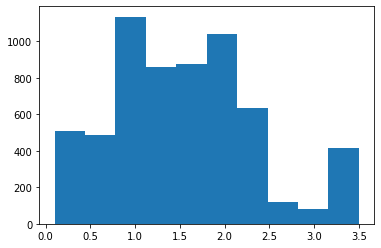

In [30]:
plt.hist(get_assumed_affinities(scores, [0.1, 3.5], 1, 0.2))

When $<1$, there is a much stronger push of the distribution to the right (and the spread is more even).

(array([759., 226.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

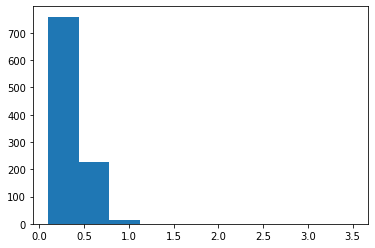

In [35]:
normal_dist = np.random.standard_normal(size=1000)
plt.hist(get_assumed_affinities(normal_dist, [0.1, 3.5], 1, 1))

Now let us apply the same parameters shifts, but to the normal distribution.

(array([456., 414.,  98.,  27.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

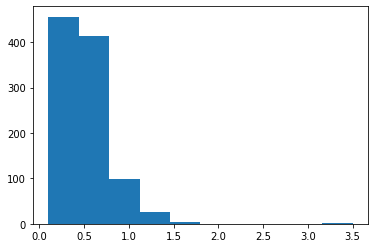

In [37]:
plt.hist(get_assumed_affinities(normal_dist, [0.1, 3.5], 120))

g:\Programming\UPythonSource\TULIP-TCR\analysis\affinity_calibration.py:25: RuntimeWarning: invalid value encountered in power
  return np.power(


(array([ 41., 209., 266., 224., 128.,  69.,  27.,  21.,  11.,   3.]),
 array([0.1       , 0.18291572, 0.26583143, 0.34874715, 0.43166286,
        0.51457858, 0.5974943 , 0.68041001, 0.76332573, 0.84624144,
        0.92915716]),
 <BarContainer object of 10 artists>)

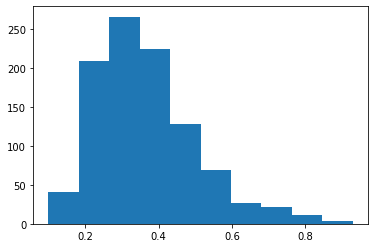

In [38]:
plt.hist(get_assumed_affinities(normal_dist, [0.1, 3.5], 1, 30))

(array([752., 222.,  22.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <BarContainer object of 10 artists>)

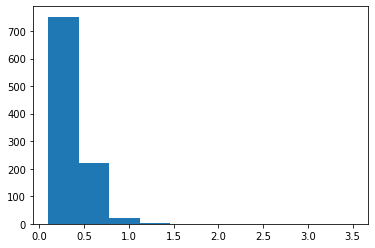

In [39]:
plt.hist(get_assumed_affinities(normal_dist, [0.1, 3.5], 1, 0.5))